# Introduction

There two data sets: one for regression, one for classification.

For regression:
Bike Sharing Dataset Data Set, 17389 samples and 16 feature values. Boxplot was used to find the outliers, and I use heatmap to try to find the relationship between feature values, and barplot and pointplot was used to display the data.

For classification:
Adult Data Set, 32561 instance and 14 attributes. Boxplot was used to find the outliers, I use heatmap, violinplot, countplot and pairplot to display the data.

# Data

Below I will introduce the data for regression and data for classification in detail.

# Introduction of data for regression

Bike Sharing Dataset Data Set 

Number of Instances: 17389

Number of Attributes: 16

Associated Tasks: Regression

Attribute Characteristics: Integer, Real

Attribute Information:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Source of the data 
UCI Machine Learning Repository:


Bike Sharing Dataset Data Set


https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Reading the data 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("hour.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print(df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [5]:
 !head -10 hour.csv

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt

1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16

2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40

3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32

4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13

5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1

6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1

7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2

8,2011-01-01,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3

9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8



## Preprocessing of the data

We will firstly check whether there is NULL value in the datasets.

In [6]:
np.any(df.isnull())

False

As there is no missing/NULL value, so in next step, the preprocessing is mainly on finding the outlier

We choose "weathersit, temp, atemp, hum, windspeed, casual, registered, cnt" draw the boxplot,because cnt is the sum of casual and registered, so we just draw "weathersit, temp, atemp, hum, windspeed, cnt".

From the box plot below, we can see that cnt contains outliers. As the cnt is combined by registered and casual user, the number in casual user is random, so some of the value in cnt may appear as outliers.

Text(0.5,1,'cnt')

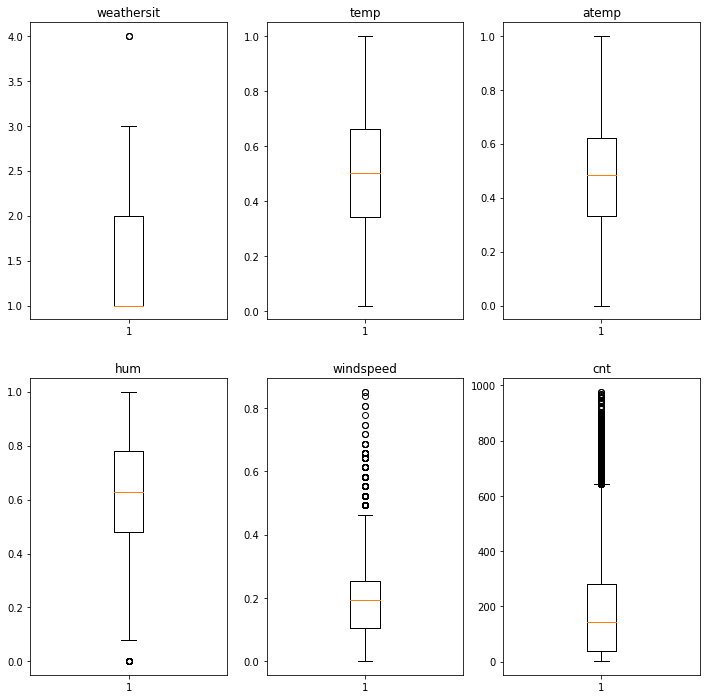

In [7]:
fig, axes = plt.subplots(nrows=2,ncols=3,sharex=False, sharey=False)
fig.set_size_inches(12, 12)

axes[0, 0].boxplot(df.weathersit)
axes[0, 0].set_title('weathersit')

axes[0, 1].boxplot(df.temp )
axes[0, 1].set_title('temp')

axes[0, 2].boxplot(df.atemp)
axes[0, 2].set_title('atemp')


axes[1, 0].boxplot(df.hum)
axes[1, 0].set_title('hum')

axes[1, 1].boxplot(df.windspeed)
axes[1, 1].set_title('windspeed')

axes[1, 2].boxplot(df.cnt)
axes[1, 2].set_title('cnt')

## Visualization of the data

Firstly, we use heatmap below to find the correlation among all the features

From the heatmap, we can tell that casual and registered all have relation with hour. Also, casual and registered all have relation with temp.

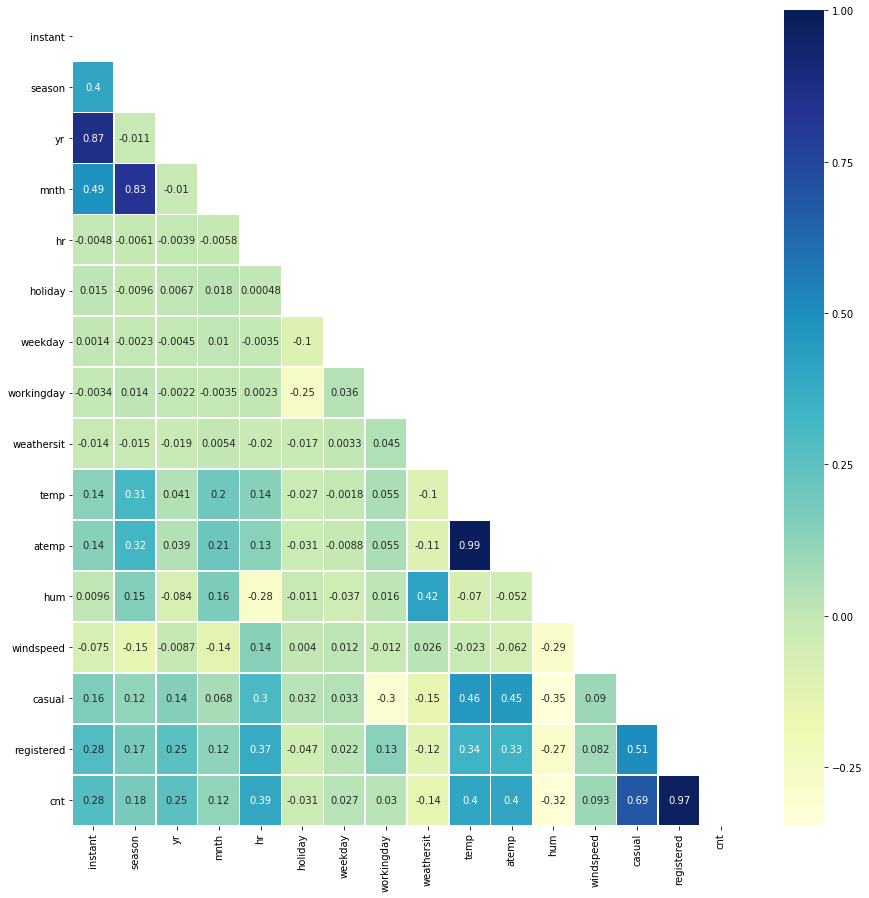

In [8]:
plt.figure(figsize=(15,15))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True, linewidths=.5)

Next, we will go on digging into the relation between casual and registered with hour,  

From the barplot below: 

1. we can see the difference between casual and registered, for casual, they are active from 11 to 19.
2. The registered have two active period:7-9, 16-19, which are the rush hours in the morning and evening.

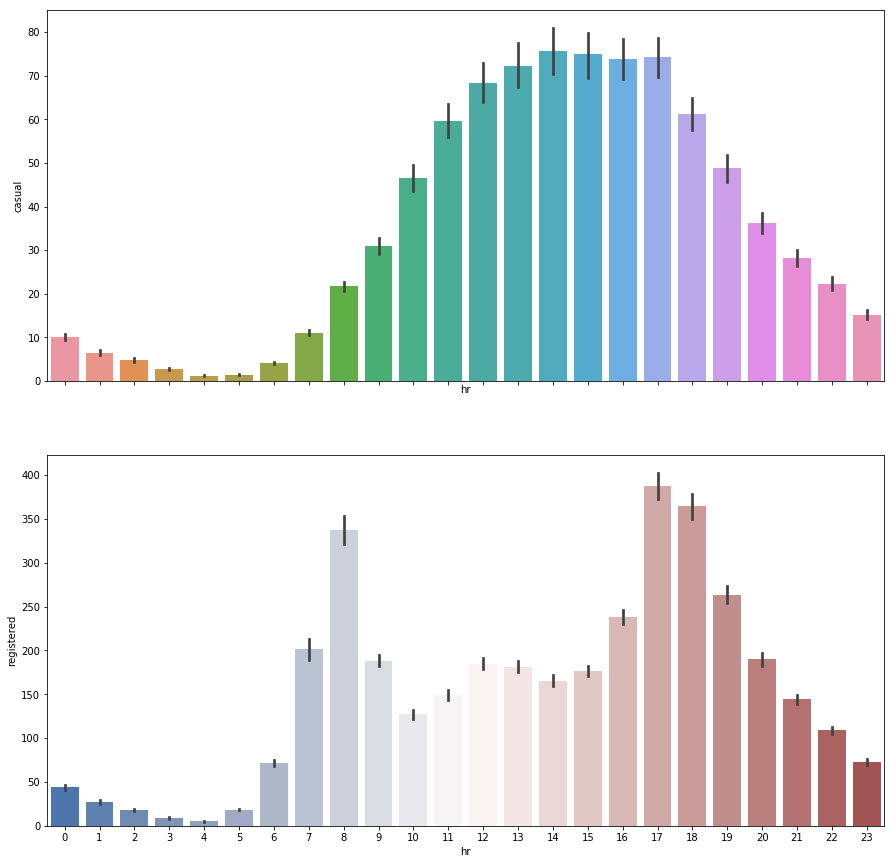

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

sns.barplot(data=df, x="hr", y="casual", ax=ax1 )

sns.barplot(data=df, x="hr", y="registered", palette="vlag", ax=ax2)

Then, we will look into the relation between casual and registered with temp.

From the pointplot below, we can see that with the temp raise, cnt is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose rent bike.

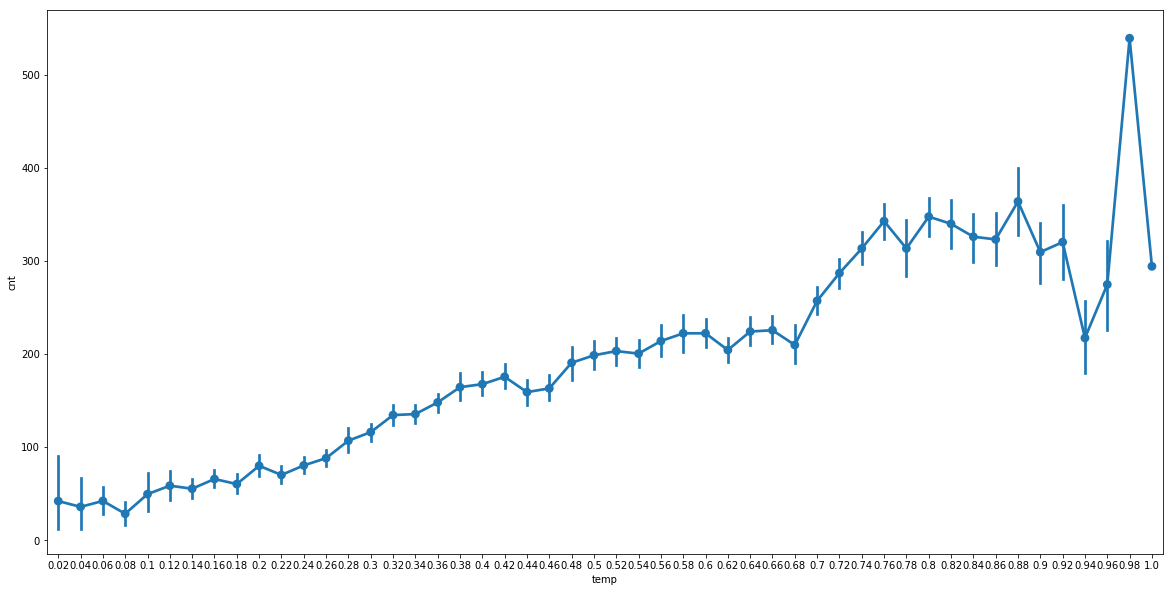

In [10]:
plt.figure(figsize=(20,10))
sns.pointplot(data=df, x="temp", y="cnt")

## Preliminary observation

1. We can see casual and registered all have relation with hour from the heatmap.  Furthermore, the difference between casual and registered is that for casual, they are active from 11 to 19. While registered have two active period:7-9, 16-19, which are the rush hours in the morning and evening. They rent bike more regularly and take as routine.

2. Also, we can see  casual and registered all have relation with temp from the heatmap. we will look into the relation between casual and registered with temp. From the pointplot, we can see that with the temp raise, cnt is increasing. which means when the temp is comfortable for the user to use bikes, then more and more user will choose renting bike.

# Introduction of data for Classification


Adult Data Set 

Number of Instances: 32561

Number of Attributes: 14

Attribute Characteristics: Categorical, Integer

Associated Tasks: Classification

Listing of attributes: 

- more than 50K, less or equal to 50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



## Source of the data

UCI Machine Learning Repository:

Adult Data Set 

https://archive.ics.uci.edu/ml/datasets/Adult

## Reading the data

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country","compare-to-50k"  ])          
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                 32561 non-null int64
workclass           32561 non-null object
fnlwgt              32561 non-null int64
education           32561 non-null object
education-number    32561 non-null int64
marital-status      32561 non-null object
occupation          32561 non-null object
relationship        32561 non-null object
race                32561 non-null object
sex                 32561 non-null object
capital-gain        32561 non-null int64
capital-loss        32561 non-null int64
hours-per-week      32561 non-null int64
native-country      32561 non-null object
compare-to-50k      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-number,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Preprocessing of the data

First, we will check if there is any missing value, and from the result below, we can tell that there is no NULL value.

In [12]:
missVal_df = (df.isnull().sum()/len(df)) * 100
print(missVal_df)

age                 0.0
workclass           0.0
fnlwgt              0.0
education           0.0
education-number    0.0
marital-status      0.0
occupation          0.0
relationship        0.0
race                0.0
sex                 0.0
capital-gain        0.0
capital-loss        0.0
hours-per-week      0.0
native-country      0.0
compare-to-50k      0.0
dtype: float64


Next, we use boxplot below to check whether there is any outlier values. We can see that hours-per-week has some value that seems to be outliers, which is because some people may not working at all, some may work for almost 100 hours per week.

Text(0.5,1,'hours-per-week')

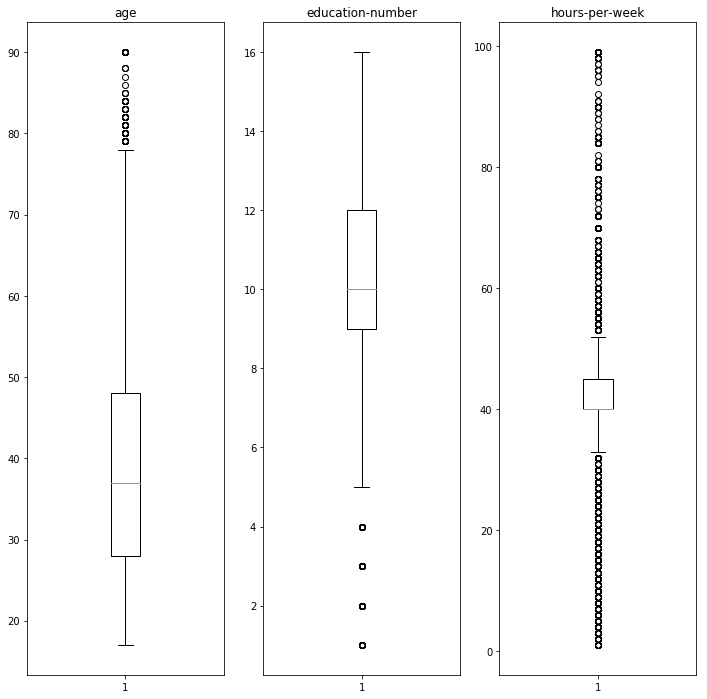

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=3, sharex=False, sharey=False)
fig.set_size_inches(12, 12)

axes[0].boxplot(df.age)
axes[0].set_title('age')

axes[1].boxplot(df["education-number"])
axes[1].set_title('education-number')

axes[2].boxplot(df["hours-per-week"])
axes[2].set_title('hours-per-week')

Then, we use heatmap below to find out whether some of the numerical values have certain relations that we can discover. From the heatmap below, we can see that there is no strong relationship between the numerical values.

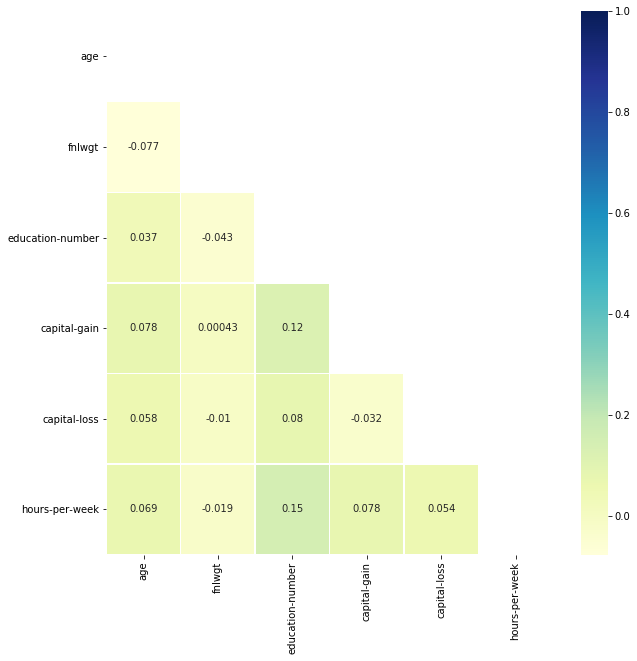

In [13]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True, linewidths=.5)

## Visualization of the data 

We first use violinplot below to find the relation between 'education-number' and 'compare-to-50k', we can see that people earn less than 50k tend to have a 9 years education, and people who earn more than 50k, theie education is longer, the peak appears at 13 years.

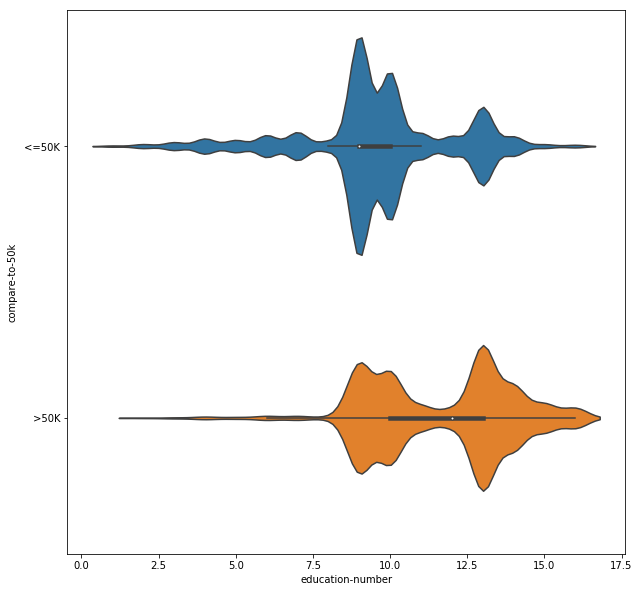

In [14]:
plt.figure(figsize=(10,10))
sns.violinplot(x="education-number", y="compare-to-50k", data=df)

Next, we try to find the relationship between 'hours-per-week' and 'compare-to-50k', we can see from below vioinplot that both less than 50k and more than 50k work 40 hours per week, however, people earn more than 50k tend to work longer, from the violinplot we can see there is a second peak around 50 hour per week for the people who earn more than 50k.

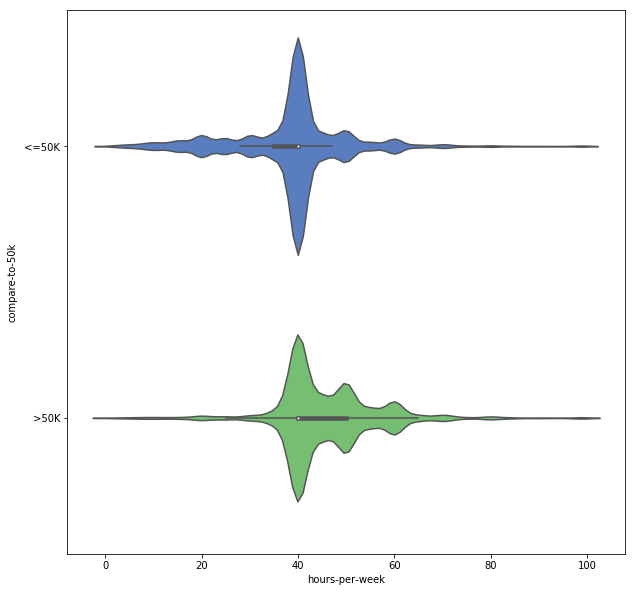

In [15]:
plt.figure(figsize=(10,10))
sns.violinplot(x="hours-per-week", y="compare-to-50k", palette="muted", data=df)

We use countplot to analysis the relationship between 'workclass' and 'compare to 50k'. From below countplot, we can see that in private, people earn the most, no matter less than or more than 50k.

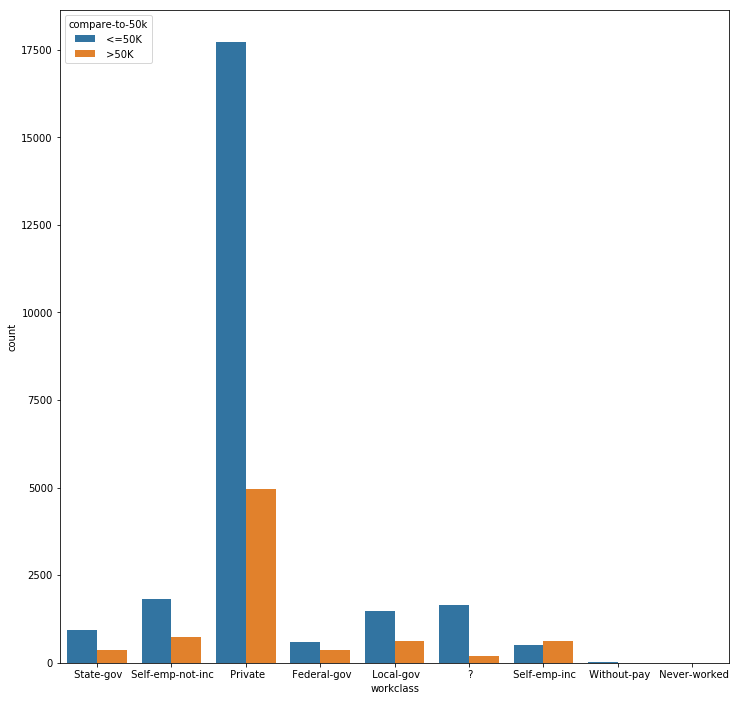

In [16]:
plt.figure(figsize=(12,12))
sns.countplot(x="workclass", hue="compare-to-50k", data=df)

Next, we analyis education level with the money they earn. From the countplot result below, we can see that high school graduate make the main part of less than 50k, and bachelors rank the first of earning more than 50k, which is reasonable, when people have higher educaiton, they acquire more knowledge and skills, which can give them better change to make more money.

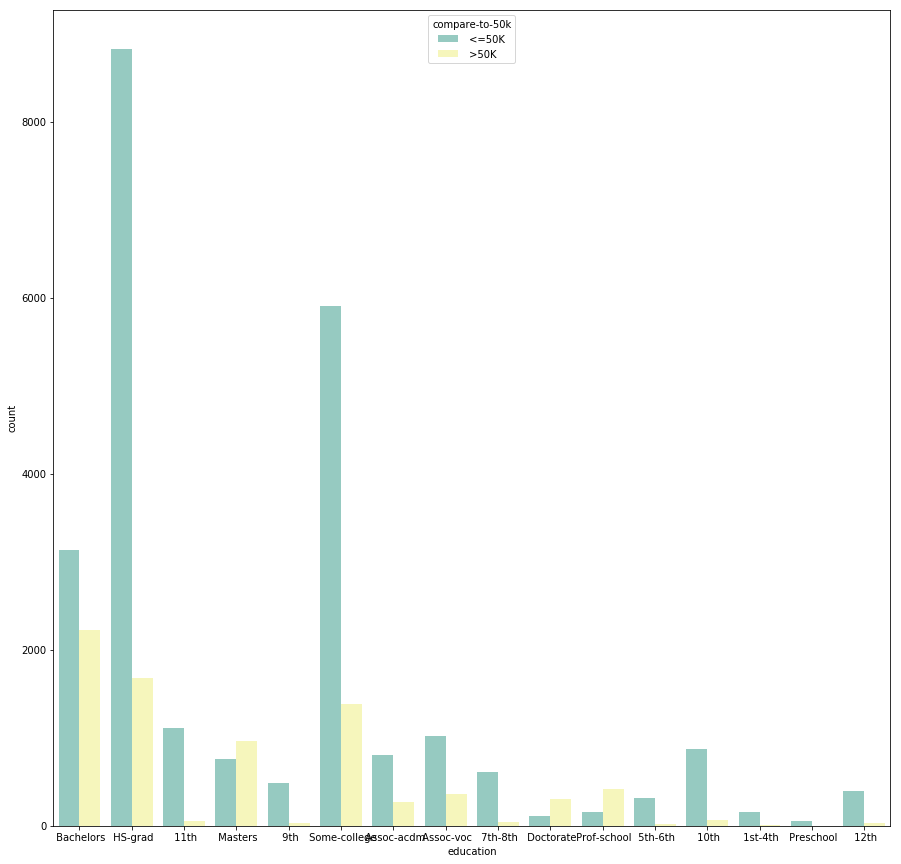

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x="education", hue="compare-to-50k", palette="Set3", data=df)

Then we analysis how relationship and compare-to-50k related, From the countplot result below, we can see that husband ranks the first in earning more than 50k, and Not-in-family rank the first in earning less than 50k, moreover, husband also ranks second high in earning less than 50k. We can see that husband make more money than wife no matter more than or less than 50k. In a family, if they own child, then the number of people earn more than 50k is little, which means the raise a child costs money.

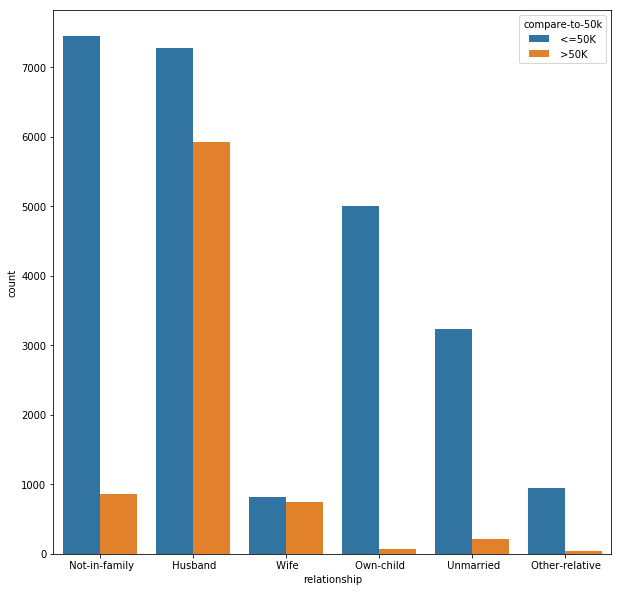

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x="relationship", hue="compare-to-50k", data=df)

As to the race. We can see from the countplot below, white people make the most money, no matter less than or more than 50k.

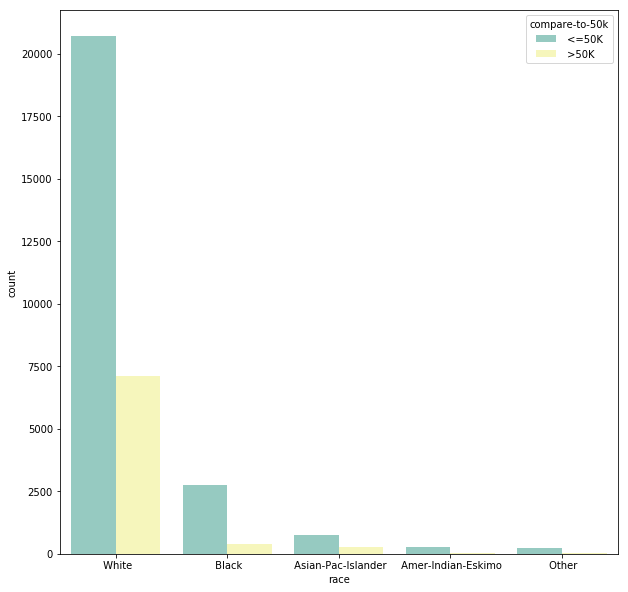

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x="race", hue="compare-to-50k", palette="Set3", data=df)

Finally, we use pairplot below to find the relationship between different numeric values, we can have the same conclusion, that is people with higher education, in the middle age tend to make more money.

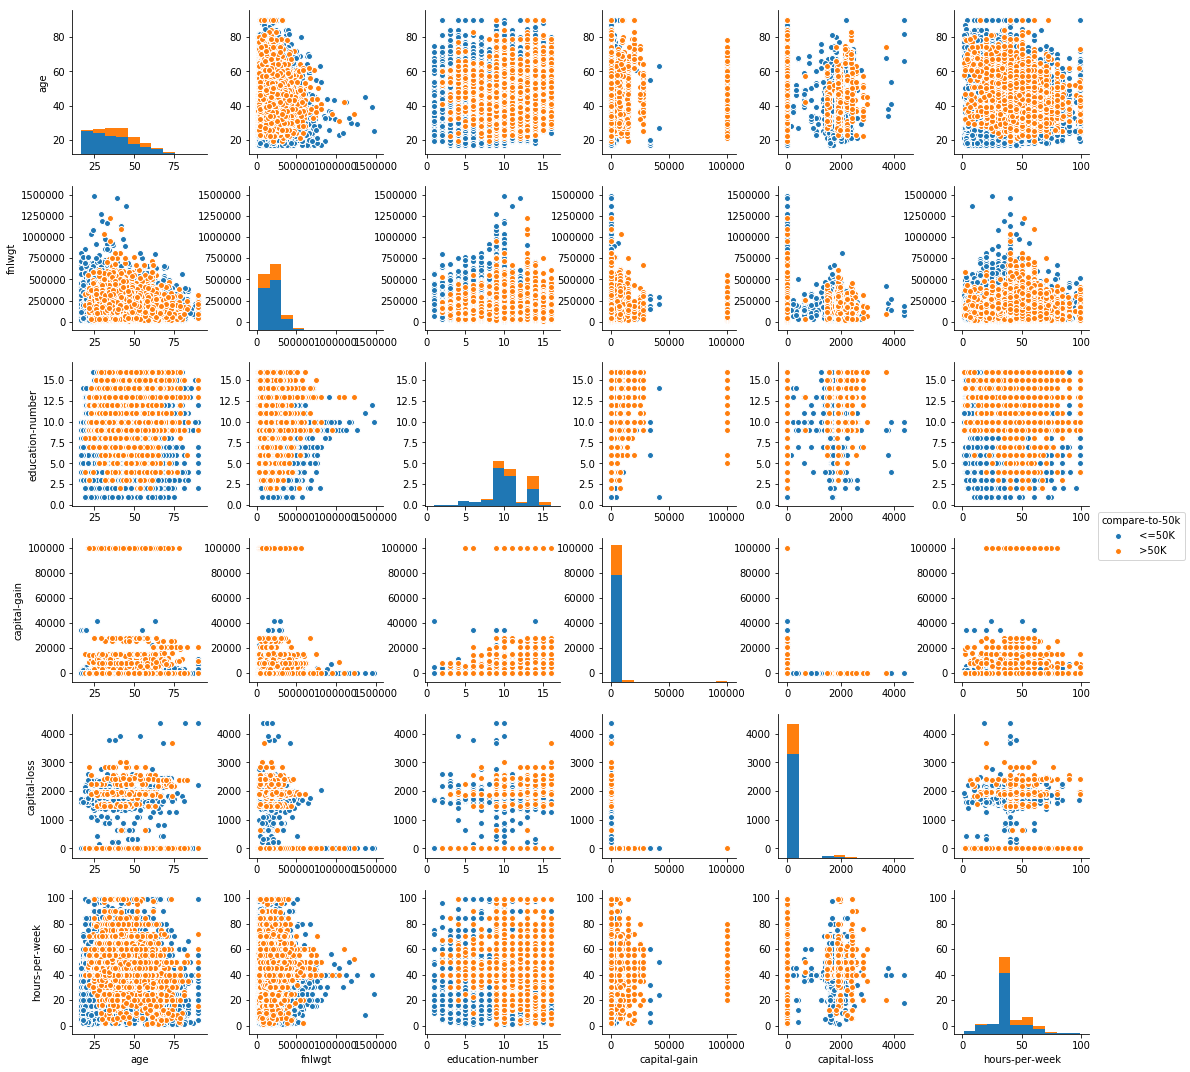

In [20]:
sns.pairplot(df, hue="compare-to-50k")

## Preliminary observation

1. We can see eople earn less than 50k tend to have a 9 years education, and people who earn more than 50k, theie education is longer, the peak appears at 13 years.

2. We can see both less than 50k and more than 50k work 40 hours per week, however, people earn more than 50k tend to work longer, there is a second peak around 50 hour per week for the people who earn more than 50k.

3. We can see that in private, people earn the most, no matter less than or more than 50k.

4. We can see that high school graduate make the main part of less than 50k, and bachelors rank the first of earning more than 50k, which is reasonable, when people have higher educaiton, they acquire more knowledge and skills, which can give them better change to make more money.

5. We can see that husband ranks the first in earning more than 50k, and Not-in-family rank the first in earning less than 50k, moreover, husband also ranks second high in earning less than 50k. We can see that husband make more money than wife no matter more than or less than 50k. In a family, if they own child, the change that they make more than 50k is low, which means raising a child costs money.

6. We can see white people make the most money, no matter less than or more than 50k.

# Conclusions

1. Raw data needs to clean, which will give a better foundation for further data analysis.
2. We can use seaborn to display the data.
3. I find how to deal with the missing value is challenging. 

# References

https://statinfer.com/104-3-5-box-plots-and-outlier-dectection-using-python/

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://stackoverflow.com/questions/34091877/how-to-add-header-row-to-a-pandas-dataframe

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/tutorial/categorical.html

https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data | 
 | 5| Introduction of data for regression
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 5| Introduction of data for Classification 
 | 5| Source of the data 
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 

